In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
london_merged.csv	t10k-labels-idx1-ubyte	titanic.csv
Mall_Customers.csv	test.csv		train-images-idx3-ubyte
Meteorite_Landings.csv	test.json		train-labels-idx1-ubyte
t10k-images-idx3-ubyte	test.xlsx


In [29]:
customers = pd.read_csv('Mall_Customers.csv')

In [30]:
gender = {'Male': 0,'Female': 1}
customers.Gender = [gender[item] for item in customers.Gender]
customers.drop('CustomerID', axis=1, inplace=True)
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [31]:
X = customers[['Annual Income (k$)', 'Age']].values
y = customers['Spending Score (1-100)'].values
h = .02

In [33]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#000AFF'])

In [34]:
clf = neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='distance')

In [35]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

In [36]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

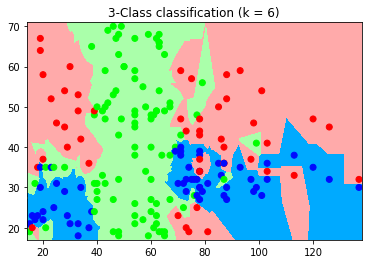

In [37]:
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (6))
plt.show()